# *Analyzing CIA Factbook Data Using SQLite and Python*

**In this Project we're working with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. You can download the SQLite database, factbook.db, from this [GitHub repo](https://github.com/factbook/factbook.sql/releases)The Factbook contains demographic information like:**
 
> <font color=blue>***population***</font> - The population as of 2015.<br>
> <font color=blue>***population_growth***</font> - The annual population growth rate, as a percentage.<br>
> <font color=blue>***area***</font> - The total land and water area.<br>

### <font color=Orange>***Aim***</font>

**Here, we'll explore the Python SQLite workflow to explore, analyze, and visualize data from this database**

### Overview 

1. Import pandas and sqlite3.
2. Connect to factbook.db and use pandas.read_sql_query() to return information on the tables in the database.
3. Write and run another query that returns the first 5 rows of the facts table in the database.

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('factbook.db')
query = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [2]:
query1 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(query1, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


**Here are the descriptions for some of the columns:**

- name - The name of the country.
- area - The total land and sea area of the country.
- population - The country's population.
- population_growth- The country's population growth as a percentage.
- birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
- death_rate - The country's death rate, or the number of death a year per 1,000 people.
- area- The country's total area (both land and water).
- area_land - The country's land area in square kilometers.
- area_water - The country's waterarea in square kilometers.

****

### Summary Statistics 

1. Write a single query that returns the:

    - minimum population
    - maximum population
    - minimum population growth
    - maximum population growth

In [3]:
query2 = '''SELECT MIN(population) 'min_pop', 
MAX(population) 'max_pop', 
MIN(population_growth) 'min_pop_growth', 
MAX(population_growth) 'max_pop_growth' 
FROM facts'''
pd.read_sql_query(query2, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


### Exploring Outliers

1. Write a query that returns the countrie(s) with a population of 0.
2. Write a query that returns the countrie(s) with a population of 7256490011.
3. In a markdown cell, type up your observations on these rows.

In [4]:
query3 = '''SELECT * FROM facts WHERE population == 0 or population == 7256490011'''
pd.read_sql_query(query3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


**Here, we can observe that country listed with zero population is Antartica, since there is nobody living there. <br>And, the country listed with 7.2 Billion people is actually the world itself where whole world's population gets counted in just a single country.**

### Histograms

1. Using just the non-outlier rows, generate a 2 by 2 grid of histograms for the following columns:

    - population
    - population_growth
    - birth_rate
    - death_rate

/home/naveen/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


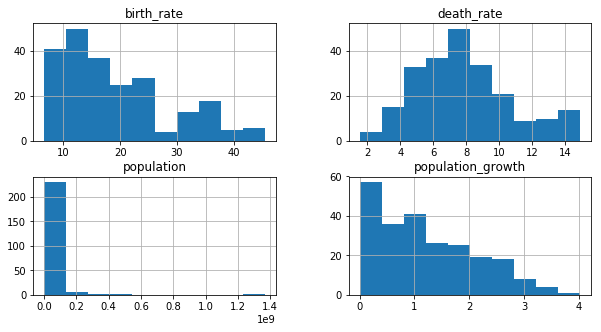

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize =(10, 5))
ax = fig.add_subplot(1, 1, 1)

query4 = '''SELECT population, population_growth, 
birth_rate, death_rate 
FROM facts
WHERE population != 0 and population != 7256490011;'''

pd.read_sql_query(query4, conn).hist(ax = ax)
plt.show()

### Next Steps

1. Which countries have the highest population density?
2. Generate a histogram of population densities.
3. Which countries have the highest ratios of water to land? Which countries have more water than land?

In [7]:
query5 = '''SELECT name, cast(population as float)/cast(area_land as float) 'population_density' 
FROM facts ORDER BY population_density desc'''

pd.read_sql_query(query5, conn)

,name,population_density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


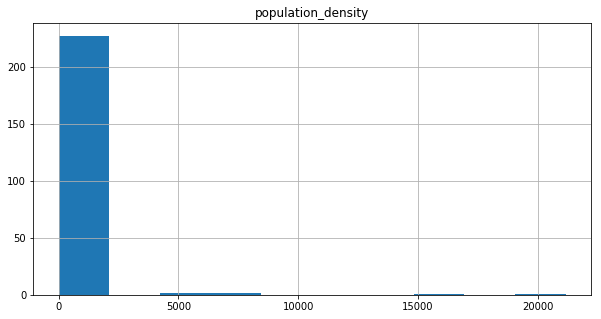

In [8]:
fig1 = plt.figure(figsize=(10, 5))
ax1 = fig1.add_subplot(1, 1, 1)
pd.read_sql_query(query5, conn).hist(ax = ax1)
plt.show()

In [9]:
query6 = '''SELECT name, cast(area_water as float)/cast(area_land as float) 
'water_land_ratio' FROM facts ORDER BY water_land_ratio desc'''
pd.read_sql_query(query6, conn)

,name,water_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [10]:
query7 = '''SELECT name, cast(area_water as float) - cast(area_land as float) 
'diff' FROM facts 
WHERE diff > 0
ORDER BY diff desc'''
pd.read_sql_query(query7, conn)

,name,diff
0,British Indian Ocean Territory,54280.0
1,Virgin Islands,1218.0
